In [16]:
from Document import Document
from ParserCACM import ParserCACM
from ParserQuery import QueryParser
from porter import stem
from TextRepresenter import PorterStemmer
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

from Index import Index, InvertedIndexPlaces
from Weighter import WeighterBoolean
from EvalIRModel import EvalIRModel

from Index import Index, InvertedIndexPlaces
from Weighter import WeighterBoolean, WeighterVector
from IRModel import Vectoriel, LanguageModel, BM25Model

from Evaluation import IRList, PrecisionRecallEval
from ParserQuery import Query

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
index = Index("cacm", "cacm/cacm.txt")
#index.indexation()

weighter = WeighterVector(index)
#weighter.calculeNorms()
#model = Vectoriel(weighter)
model = BM25Model(weighter)

In [ ]:
filename_queries="cacm/cacm.qry"
filename_jugements="cacm/cacm.rel"

query_parser = QueryParser()
query_parser.initFile(filename_queries, filename_jugements)

query_parser.nextQuery()
query_parser.nextQuery()
query_parser.nextQuery()
query = query_parser.nextQuery()

rank = model.getRanking(query.text_)
irlist = IRList(query, rank)
x, y = PrecisionRecallEval().eval(irlist)
plt.plot(x, y)

In [37]:
output = EvalIRModel().evalModel(model)

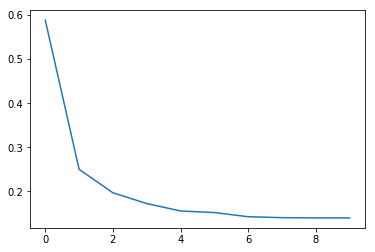

In [38]:
y = output['precision_recall']
plt.plot(range(len(y)), y)